# 1.Missing values

In [1]:
import pandas as pd
import numpy as np

In [2]:
fasy_values=(0,False,None,'',{},[])

In [3]:
any(fasy_values)

False

In [4]:
# the above datatype is like virus any thing touches become null
np.nan

nan

In [5]:
3+np.nan

nan

In [6]:
a=np.array([1,2,3,np.nan,np.nan])

In [7]:
a.sum()

nan

In [8]:
a.mean()

nan

In [9]:
a[-1]

nan

In [10]:
a[0:5]

array([ 1.,  2.,  3., nan, nan])

This is better than regular None values, which in the previous examples would have raised an exception:

In [11]:
# 3 + None

In [12]:
b=np.array([1,2,3,np.nan,None],dtype='float32')

In [13]:
b

array([ 1.,  2.,  3., nan, nan], dtype=float32)

As we said, np.nan is like a virus. If you have any nan value in an array and you try to perform an operation on it, you'll get unexpected results:

In [14]:
b.mean()

nan

In [15]:
b.sum()

nan

In [16]:
b+4

array([ 5.,  6.,  7., nan, nan], dtype=float32)

Numpy also support infinite type

In [17]:
np.inf

inf

In [18]:
np.inf+4
# which is also like virus!!!!!!!!!! 

inf

In [19]:
np.inf/3

inf

In [20]:
c=np.array([4,7,np.nan,None,np.inf],dtype='float32')

In [21]:
c.sum()

nan

# checking for 'nan' & 'INF' values


In [22]:
np.isnan(np.nan),


(True,)

In [23]:
np.isnan(a)

array([False, False, False,  True,  True])

In [24]:
np.isinf(np.inf)

True

In [25]:
np.isinf(c)

array([False, False, False, False,  True])

In [26]:
np.isnan(np.nan),np.isinf(np.inf)

(True, True)

In [27]:
np.isfinite(np.array([1,32,45,np.nan,np.inf]))

array([ True,  True,  True, False, False])

# filtering them out 

kick out the viruses means nan ,inf & none

In [28]:
d=np.array([1,32,45,np.nan,np.inf])

In [29]:
d[~np.isnan(d)]

array([ 1., 32., 45., inf])

equivalent to

In [30]:
d[np.isfinite(d)]

array([ 1., 32., 45.])

Now all operation performed lates perform the OPERATION

In [31]:
d[np.isfinite(d)].sum()

78.0

In [32]:
d[~np.isnan(d)].sum()
# bcoz the isnan present the the array

inf

# handling with missing values with Pandas

In [33]:
pd.isna(np.nan)

True

In [34]:
pd.isnull(np.nan)

True

In [35]:
pd.isnull(None)

True

In [36]:
pd.isnull(np.nan)

True

In [37]:
pd.notnull(np.nan)

False

In [38]:
pd.notna(None)

False

In [39]:
pd.notnull(90)

True

these function with now Series

In [40]:
pd.notna(pd.Series([1,3,5,7,10,np.nan]))

0     True
1     True
2     True
3     True
4     True
5    False
dtype: bool

In [41]:
pd.isna(pd.Series([78,90,None]))

0    False
1    False
2     True
dtype: bool

In [42]:
pd.isnull(pd.DataFrame({
    "Col A":[1,3,np.nan],
    "Col B":[np.nan,8,99]
}))

,Col A,Col B
0,False,True
1,False,False
2,True,False


# Pandas operation with missing values

In [43]:
pd.Series([1,2,np.nan]).count()

2

In [44]:
pd.Series([7,6,np.nan]).sum()

13.0

In [45]:
pd.Series([9,67,334,np.nan]).mean()

136.66666666666666

### filtering missing value

In [46]:
s=pd.Series([1,2,3,np.nan,np.nan])

In [47]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [48]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [49]:
pd.isnull(s).sum()

2

In [50]:
pd.notnull(s).sum()

3

In [51]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
dtype: float64

In [52]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [53]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [54]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
dtype: float64

In [55]:
s[s.isnull()]

3   NaN
4   NaN
dtype: float64

# Dropping null values of Series

In [56]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [57]:
s.dropna()

0    1.0
1    2.0
2    3.0
dtype: float64

# Dropping null values of DataFrames

In [58]:
df1=pd.DataFrame({
    "col A":[1,2,np.nan,4],
    "col B":[5,6,7,np.nan],
    "col C":[11,np.nan,12,45],
})

In [59]:
df1.isnull()

,col A,col B,col C
0,False,False,False
1,False,False,True
2,True,False,False
3,False,True,False


In [60]:
df1.notnull()

,col A,col B,col C
0,True,True,True
1,True,True,False
2,False,True,True
3,True,False,True


In [61]:
df1.dropna(axis=0)

,col A,col B,col C
0,1.0,5.0,11.0


In this case we're dropping rows. Rows containing null values are dropped from the DF. You can also use the axis parameter to drop columns containing null values:

In [62]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [63]:
df2.dropna(how='all')

,Column A,Column B,Column C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


In [64]:
df2.dropna(how='any')

,Column A,Column B,Column C
2,30.0,31.0,100.0


You can also use the thresh parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept:

In [65]:
df1.dropna(thresh=3)

,col A,col B,col C
0,1.0,5.0,11.0


In [66]:
df1.dropna(thresh=0, axis='columns')

,col A,col B,col C
0,1.0,5.0,11.0
1,2.0,6.0,NaN
2,NaN,7.0,12.0
3,4.0,NaN,45.0


# filling missing value OR null values

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on your context and the dataset you're currently working. Sometimes a nan can be replaced with a 0, sometimes it can be replaced with the mean of the sample, and some other times you can take the closest value. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [67]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [68]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
dtype: float64

In [69]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.0
4    2.0
dtype: float64

In [70]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [71]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
dtype: float64

In [72]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [73]:
pd.Series([1,3,4,np.nan]).fillna(method='ffill')

0    1.0
1    3.0
2    4.0
3    4.0
dtype: float64

In [74]:
df1.fillna(method='bfill')

,col A,col B,col C
0,1.0,5.0,11.0
1,2.0,6.0,12.0
2,4.0,7.0,12.0
3,4.0,NaN,45.0


In [75]:
df1.fillna({'col A': 0, 'col B': 99, 'col C': df1['col C'].mean()})

,col A,col B,col C
0,1.0,5.0,11.000000
1,2.0,6.0,22.666667
2,0.0,7.0,12.000000
3,4.0,99.0,45.000000


In [76]:
df2=pd.DataFrame({
    "col A":[1,4,np.nan,89],
    "col B":[9,88,np.nan,45],
    "col C":[45,np.nan,77,101]
})

In [77]:
df2.fillna({"col A":99,"col B":df2['col B'].mean(),"col C":df2['col C'].sum()})

,col A,col B,col C
0,1.0,9.000000,45.0
1,4.0,88.000000,223.0
2,99.0,47.333333,77.0
3,89.0,45.000000,101.0


# Checking if there is NA present

In [78]:
df2.dropna().count()

col A    2
col B    2
col C    2
dtype: int64

In [79]:
miss_value=len(df2.dropna())!=len(df2)
miss_value

True

In [80]:
len(df2)

4

In [81]:
df2.count()

col A    3
col B    3
col C    3
dtype: int64

In [82]:
df2.any()
# check the any True value in df

col A    True
col B    True
col C    True
dtype: bool

In [83]:
df2.all()
# check all true value in df

col A    True
col B    True
col C    True
dtype: bool

In [84]:
df2.any()

col A    True
col B    True
col C    True
dtype: bool

In [85]:
df2.any().values

array([ True,  True,  True])

In [86]:
df2.isnull().any()

col A    True
col B    True
col C    True
dtype: bool

In [87]:
df2.notnull().all()

col A    False
col B    False
col C    False
dtype: bool

# Cleaning Not Null values

In [88]:
df3=pd.DataFrame({
    "sex":['M','F','M','F','E','?','M'],
    "AGE":[23,45,67,78,456,12,3]
})

### finding unique values

The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present. For that, we use the unique() method:

In [89]:
df3['sex'].unique().shape

(4,)

In [90]:
df3['sex'].value_counts()

M    3
F    2
E    1
?    1
Name: sex, dtype: int64

In [91]:
df3

,sex,AGE
0,M,23
1,F,45
2,M,67
3,F,78
4,E,456
5,?,12
6,M,3


In [92]:
df3['sex'].replace('E','F')

0    M
1    F
2    M
3    F
4    F
5    ?
6    M
Name: sex, dtype: object

In [108]:
df3.replace({
    "sex":{'?':'M','E':'F'},
    "AGE":{456:45}
},inplace=True)

In [109]:
df3[df3['AGE']>100]

,sex,AGE


In [110]:
df3.rename(columns={'AGE':'age'})

,sex,age
0,M,23
1,F,45
2,M,67
3,F,78
4,F,45
5,M,12
6,M,3


In [111]:
# df3.loc[df3['age'] > 100, 'age'] = df3.loc[df3['age'] > 100, 'age'] / 10

# Duplicates

removing duplicates

In [112]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [113]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [115]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [119]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [ ]:
# ambassadors.duplicated(keep='first')

In [122]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [124]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [125]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [126]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

## Duplicates in dataframe

In [127]:
df4=pd.DataFrame({
     'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [128]:
df4

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [133]:
df4.duplicated(subset='Name')

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [134]:
df4.drop_duplicates(subset='Name')

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [136]:
df4.duplicated(subset='Name',keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

# Handling Text Values

In [137]:
df5=pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]
})

In [138]:
df5

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [139]:
df5['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [140]:
df5

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [144]:
df51=df5['Data'].str.split('_',expand=True)

In [145]:
df51.columns=['Year', 'Sex', 'Country', 'No Children']

In [146]:
df51

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [148]:
df51['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [149]:
df51['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [150]:
df51['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [151]:
df51['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [152]:
df51['Year'].str.replace(r'(?P<year>\d{4})\?',lambda m:m.group('year'))

C:\Users\SOMASH~1\AppData\Local\Temp/ipykernel_7636/2200017828.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df51['Year'].str.replace(r'(?P<year>\d{4})\?',lambda m:m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

# More visualation

In [2]:
!pip install matplotlib 

     ---------------------------------------- 7.2/7.2 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 40.8/40.8 KB 391.2 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 98.5/98.5 KB 1.4 MB/s eta 0:00:00

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\f2py.exe' -> 'C:\\Python310\\Scripts\\f2py.exe.deleteme'




     -------------------------------------- 247.7/247.7 KB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 930.7/930.7 KB 5.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np

### General API

In [3]:
x=np.arange(1,11)
x=x**2

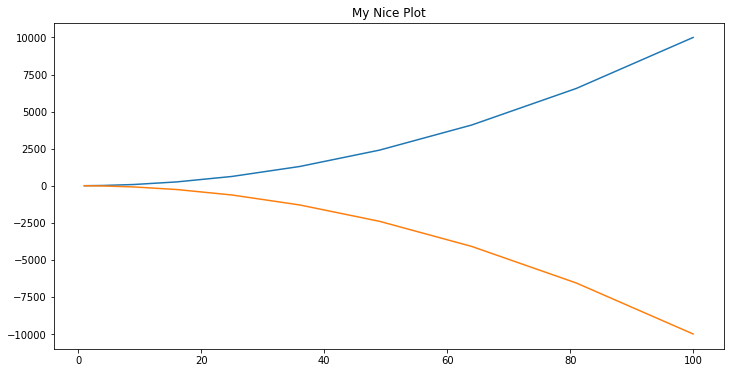

In [4]:
plt.figure(figsize=(12,6))
plt.title('My Nice Plot')
plt.plot(x,x**2)
plt.plot(x,-1*(x**2))

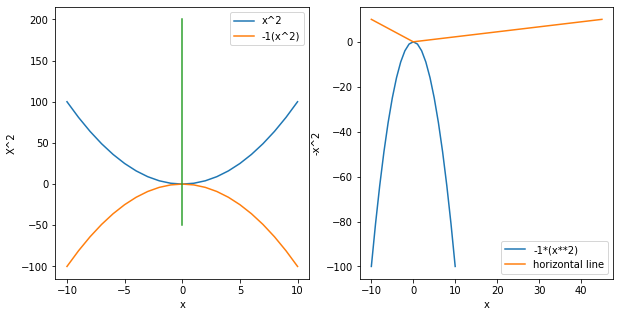

In [5]:
plt.figure(figsize=(10,5))
plt.title('My second plot')
x=np.arange(-10,11)
# first subplot
plt.subplot(1,2,1)# rows, columns, panel selected
plt.plot(x,x**2)
plt.plot(x,-1*(x**2))
plt.plot([0,0,0],[-50,0,200])
plt.legend(['x^2','-1(x^2)'])
plt.xlabel('x')
plt.ylabel('X^2')

# second subplot
plt.subplot(1,2,2)
plt.plot(x,-1*(x**2))
plt.plot([-10,0,45],[10,0,10])
plt.legend(['-1*(x**2)','horizontal line'])
plt.xlabel('x')
plt.ylabel('-x^2')

plt.show()

# oops interface

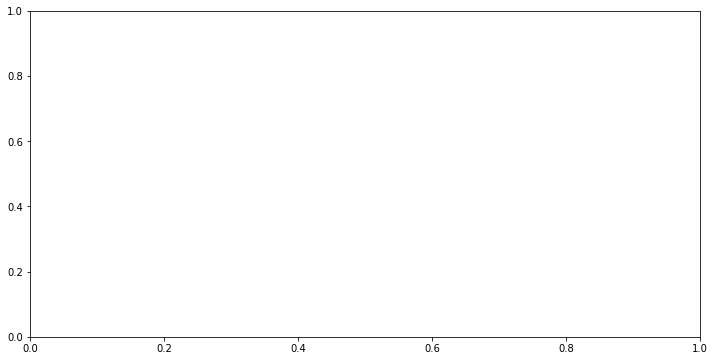

In [6]:
fig,axes=plt.subplots(figsize=(12,6))

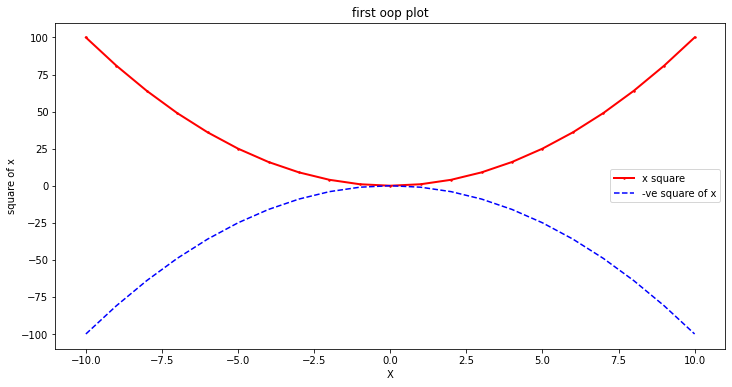

In [7]:
axes.plot(x,(x**2),color='red',linewidth=2,marker='.',markersize=3,label='x square')
axes.plot(x,-1*(x**2),'b--',label='-ve square of x')
axes.set_xlabel('X')
axes.set_ylabel('square of x')
axes.set_title('first oop plot')

axes.legend()
fig


Text(0.5, 1.0, 'My Nice Plot')

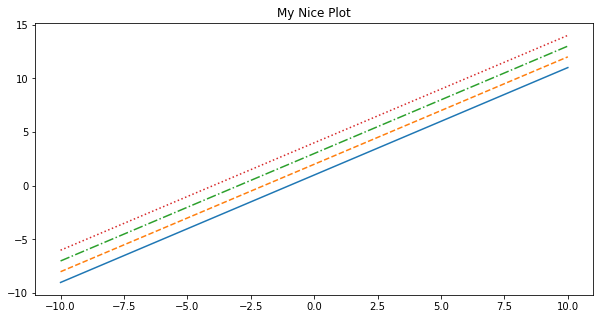

In [8]:
fig,axes=plt.subplots(figsize=(10,5))
axes.plot(x,x+1,linestyle='solid')
axes.plot(x,x+2,linestyle='dashed')
axes.plot(x, x + 3, linestyle='dashdot')
axes.plot(x, x + 4, linestyle='dotted');

axes.set_title("My Nice Plot")


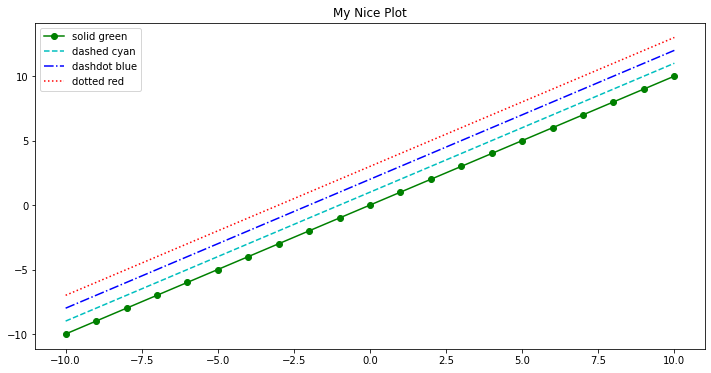

In [9]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

lot of marker types


In [10]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [11]:
linestyles=['_','-','--',':']
print('line style:{}'.format(linestyles))

line style:['_', '-', '--', ':']


# other type of plots


#### figures and subplots

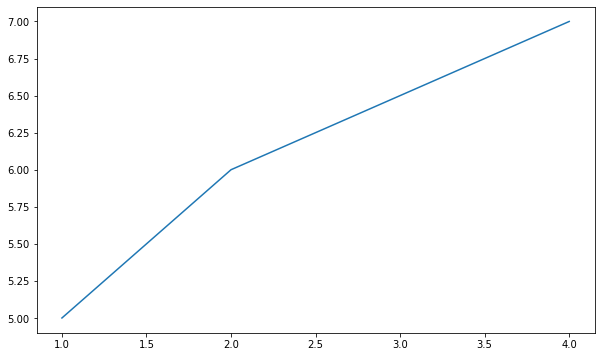

In [13]:
fig,axes=plt.subplots(figsize=(10,6))
axes.plot([1,2,4],[5,6,7])


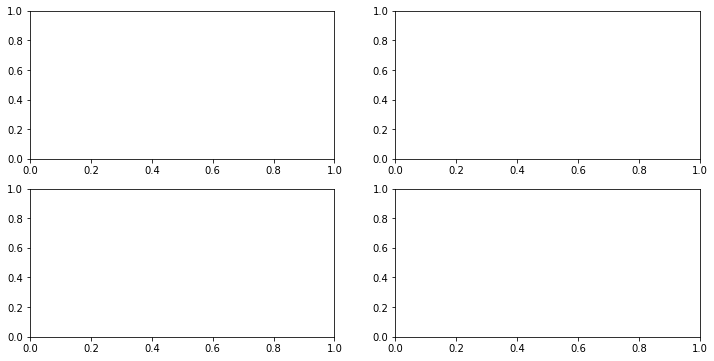

In [20]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(12,6))


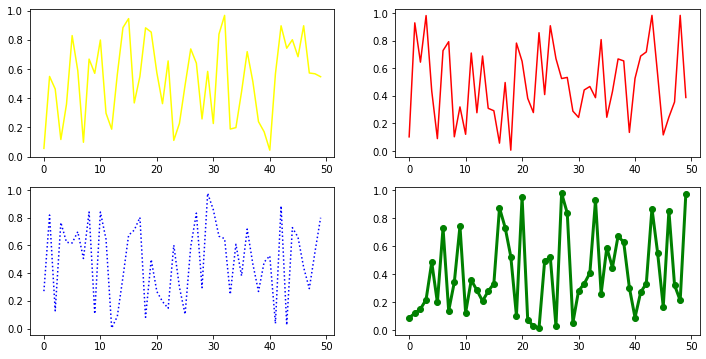

In [21]:
ax1.plot(np.random.rand(50),c='yellow')
ax2.plot(np.random.rand(50),c='red',linestyle='-')
ax3.plot(np.random.rand(50),c='blue',linestyle=':')
ax4.plot(np.random.rand(50),c='green',marker='o',linewidth='3')
fig

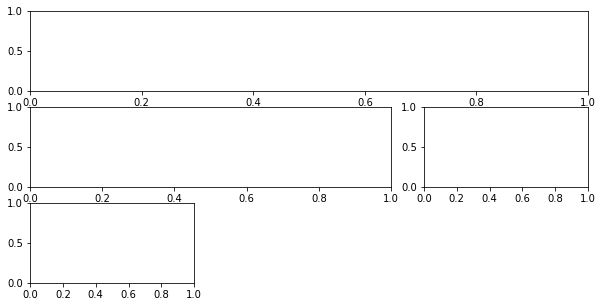

In [26]:
plt.figure(figsize=(10,5))

ax1=plt.subplot2grid((3,3),(0,0),colspan=3)
ax2=plt.subplot2grid((3,3),(1,0),colspan=2)
ax3=plt.subplot2grid((3,3),(1,2),colspan=1)
ax4=plt.subplot2grid((3,3),(2,0),colspan=1)

### Scator plot


In [46]:
x=np.random.rand(50)
y=np.random.rand(50)
color=np.random.rand(50)
area=np.pi*(np.random.rand(50)*20)**2

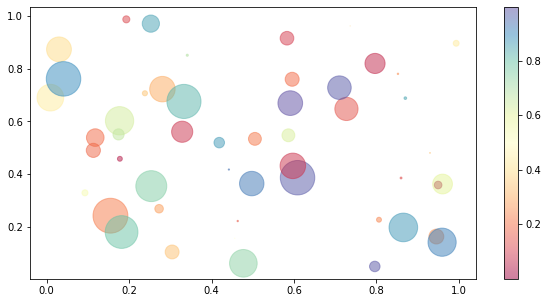

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=area,c=color,alpha=0.5,cmap='Spectral')
plt.colorbar()
plt.show()

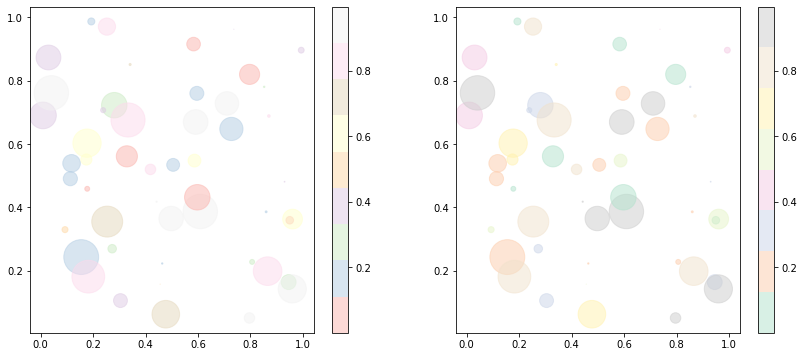

In [49]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=color, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=color, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

# Histogram

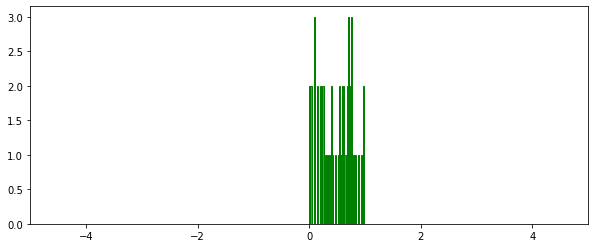

In [51]:
plt.figure(figsize=(10,4))
plt.hist(np.random.rand(50),bins=50,histtype='bar',color='steelblue',edgecolor='green')
plt.xlim(xmin=-5,xmax=5)
plt.show()

# Bar Plots